In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# Make use of a GPU or MPS (Apple) if one is available.  (see module 3.2)
import torch
has_mps = torch.backends.mps.is_built()
device = "mps" if has_mps else "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Mounted at /content/drive
Note: using Google CoLab
Using device: cuda


In [ ]:
!mkdir -p '/content/drive/MyDrive/Bioinformatics/'
!mkdir -p '/content/drive/MyDrive/Bioinformatics/Data/'



In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Bioinformatics/')

In [ ]:
if COLAB:
  !pip install jupyterthemes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
import importlib
import warnings
warnings.filterwarnings("ignore")

import os
current_directory = os.getcwd()
print(current_directory)

import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=True)
import seaborn as sns

%load_ext autoreload
%autoreload 2

/content


In [ ]:
# Read the first line separately to handle the column names
with open('/content/drive/MyDrive/Bioinformatics/Data/countdata5.txt', 'r') as file:
    first_line = file.readline().strip()

# Split the first line to get the column names
columns = first_line.split()

print("Column names after splitting:")
print(columns)

# Read the rest of the data, using delim_whitespace to handle space-separated values
df = pd.read_csv('/content/drive/MyDrive/Bioinformatics/Data/countdata5.txt', sep='\s+', skiprows=1, names=columns, na_values=['NA', 'NaN', ''])
# Strip any leading or trailing whitespace from column names (if any)
df.columns = df.columns.str.strip()


print("DataFrame with corrected columns:")
print(df.head())

# Set the first column as the index (assuming it is the gene ID column)
#df.set_index(df.columns[0], inplace=True)

# Display the first few rows to verify the changes
print("DataFrame with Gene ID as index:")
print(df.head())

# Check the number of columns
print("Number of columns:", len(df.columns))

Column names after splitting:
['"SRR7538401"', '"SRR7538402"', '"SRR7538403"', '"SRR7538404"', '"SRR7538405"', '"SRR7538406"', '"SRR7538407"', '"SRR7538408"', '"SRR7538409"', '"SRR7538410"', '"SRR7538411"', '"SRR7538412"', '"SRR7538413"', '"SRR7538414"', '"SRR7538418"', '"SRR7538419"', '"SRR7538420"', '"SRR7538423"', '"SRR7538424"', '"SRR7538425"', '"SRR7538426"', '"SRR7538427"', '"SRR7538428"', '"SRR7538429"', '"SRR7538430"', '"SRR7538431"', '"SRR7538432"', '"SRR7538433"', '"SRR7538434"', '"SRR7538435"', '"SRR7538436"', '"SRR7538437"', '"SRR7538438"', '"SRR7538439"', '"SRR7538440"', '"SRR7538441"', '"SRR7538442"', '"SRR7538443"', '"SRR7538444"']
DataFrame with corrected columns:
                    "SRR7538401"  "SRR7538402"  "SRR7538403"  "SRR7538404"  \
ENSMUSG00000104478           0.0           0.0           0.0           0.0   
ENSMUSG00000104385           0.0           0.0           0.0           0.0   
ENSMUSG00000101231           0.0           0.0           0.0           0.0   

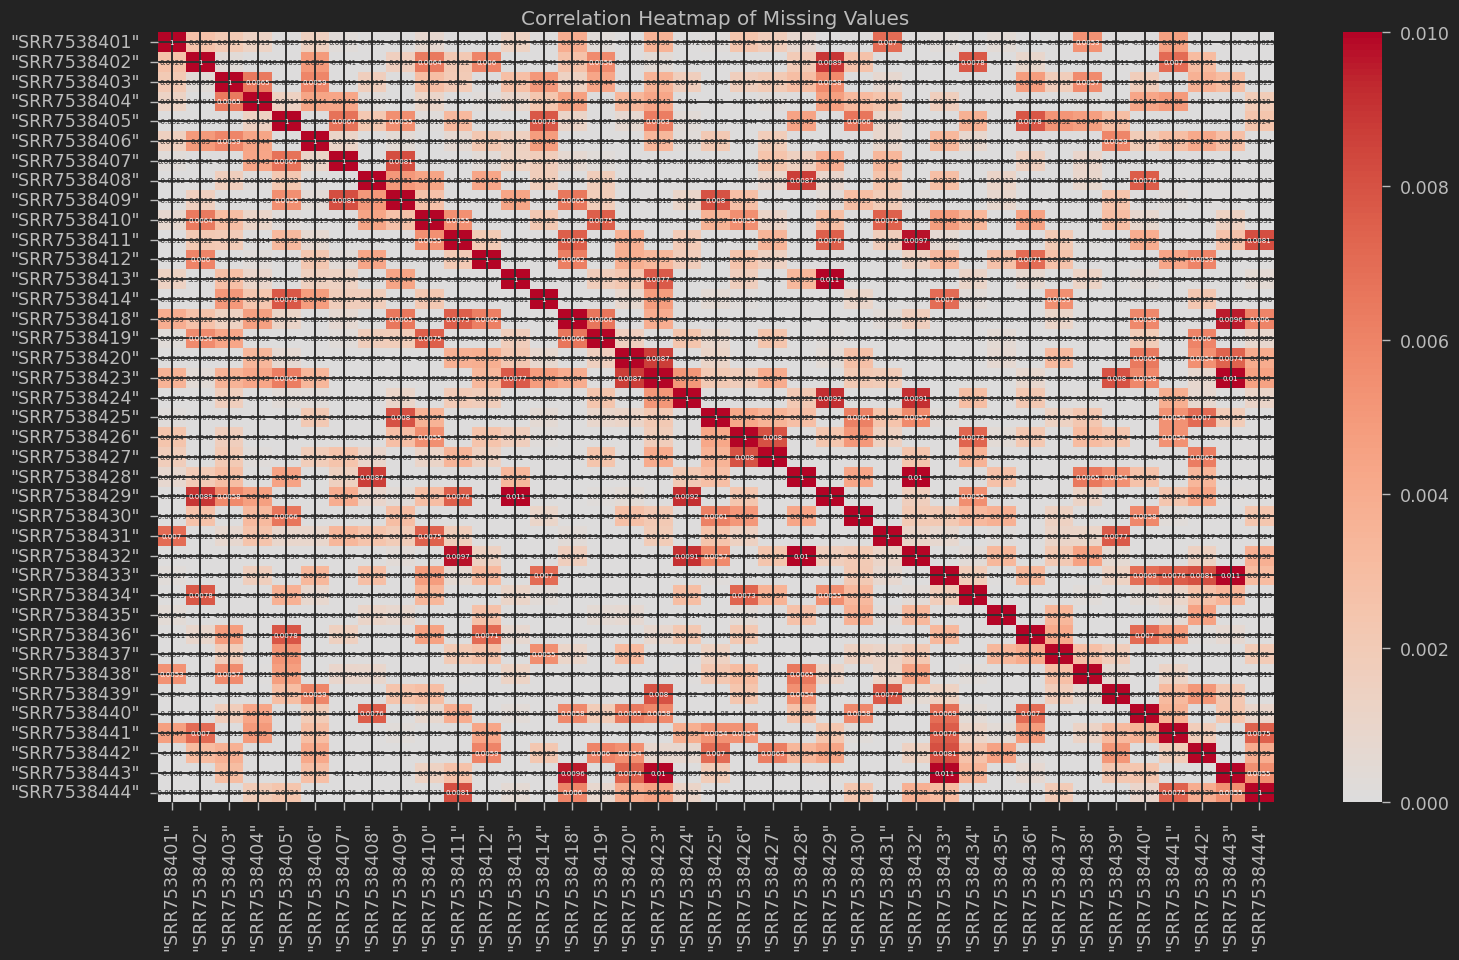

In [ ]:
# Calculate the correlation matrix for missing values
missing_corr = df.isnull().corr()

# Plot the correlation heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', center=0, vmin=0, vmax=0.01,  annot_kws={"size": 5})
plt.title('Correlation Heatmap of Missing Values')
plt.show()


In [ ]:
# Calculate the percentage of missing values for each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / df.shape[0]) * 100

# Combine the results into a DataFrame
missing_stats = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display the statistics
missing_stats = missing_stats.sort_values(by='Missing Values', ascending=False)
missing_stats

,Missing Values,Percentage
"""SRR7538435""",2942,5.145156
"""SRR7538443""",2938,5.138160
"""SRR7538434""",2927,5.118923
"""SRR7538440""",2927,5.118923
"""SRR7538430""",2910,5.089192
"""SRR7538409""",2908,5.085694
"""SRR7538428""",2907,5.083945
"""SRR7538405""",2905,5.080448
"""SRR7538442""",2904,5.078699
"""SRR7538432""",2893,5.059461


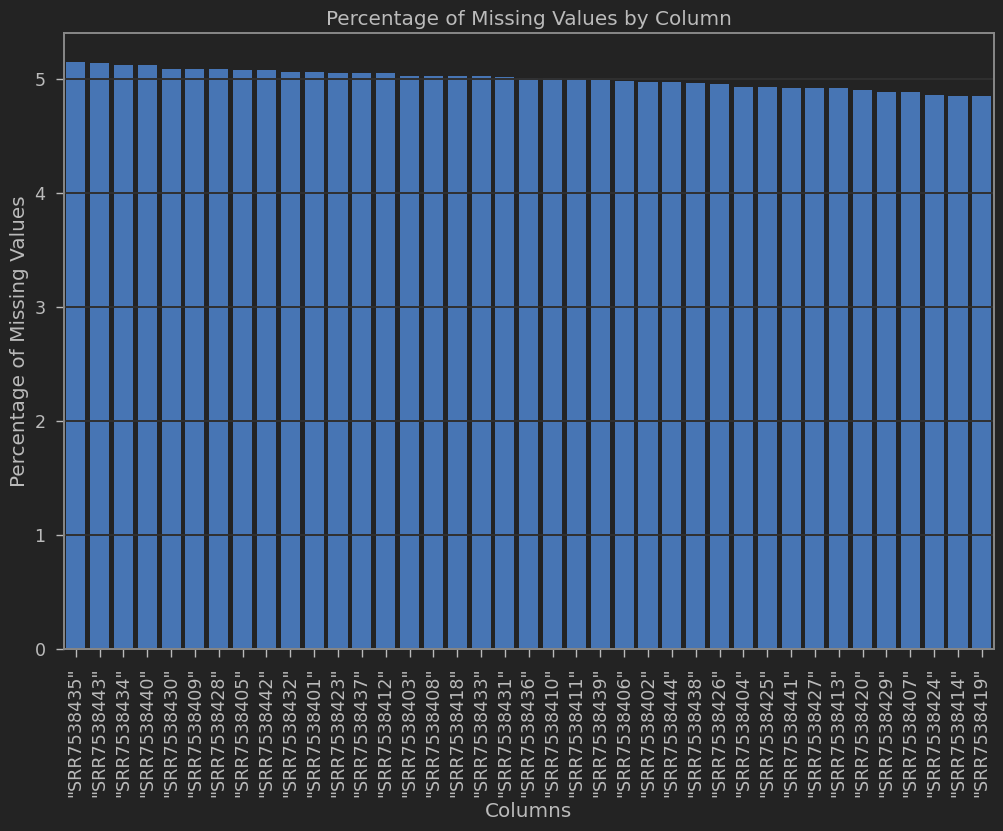

In [ ]:
import seaborn as sns

# Plot the percentage of missing values for each column
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_stats.index, y=missing_stats['Percentage'])
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Column')
plt.show()


## Theoretical Introduction to Multiple Imputation by Chained Equations (MICE)

### Introduction

In the context of missing data, Multiple Imputation by Chained Equations (MICE) is a popular method for handling datasets with missing values. The method is particularly useful when the data are assumed to be Missing At Random (MAR).

### Multiple Imputation by Chained Equations (MICE)

The MICE algorithm generates multiple imputations (filled-in values) for each missing entry by iterating through a series of conditional models, each corresponding to one of the variables with missing data.

#### Steps in the MICE Algorithm

1. **Initial Imputation**: Start by filling in all missing entries with initial guesses, such as the mean of the observed data for continuous variables or the mode for categorical variables.
2. **Iterative Imputation**: For each variable with missing data, repeat the following steps:
    - **Step 1**: Set the variable with missing values as the target variable.
    - **Step 2**: Use the remaining variables as predictors to model the target variable.
    - **Step 3**: Replace the missing values with the predicted values from the model.
    - **Step 4**: Move to the next variable and repeat steps 1 to 3.
3. **Repeat**: Iterate the process for a specified number of iterations to allow the imputations to stabilize.
4. **Multiple Imputations**: Generate multiple imputed datasets (usually 5-10) by repeating the iterative imputation process independently for each imputation.

### Statistical Models Used in MICE

Different types of models can be used for imputing different types of variables:

- **Linear regression** for continuous variables.
- **Logistic regression** for binary variables.
- **Multinomial logistic regression** for categorical variables with more than two categories.

### Combining Results from Multiple Imputations

Once multiple imputed datasets are generated, statistical analyses are performed on each dataset separately. The results are then combined to produce overall estimates and standard errors. This combination is typically done using Rubin's rules.

#### Rubin's Rules

Let $\hat{Q}_m$ be the estimate of the parameter $Q$ from the $m$-th imputed dataset, and let $\hat{U}_m$ be the associated variance. Rubin's rules for combining these estimates are:

1. **Pooled Estimate**:

$$
\hat{Q} = \frac{1}{M} \sum_{m=1}^{M} \hat{Q}_m
$$

2. **Within-Imputation Variance**:

$$
\bar{U} = \frac{1}{M} \sum_{m=1}^{M} \hat{U}_m
$$

3. **Between-Imputation Variance**:

$$
B = \frac{1}{M-1} \sum_{m=1}^{M} (\hat{Q}_m - \hat{Q})^2
$$

4. **Total Variance**:

$$
T = \bar{U} + \left(1 + \frac{1}{M}\right) B
$$

The pooled standard error is the square root of the total variance $T$.

### Conclusion

MICE is a flexible and powerful method for handling missing data, especially under the MAR assumption. By generating multiple imputed datasets and combining the results, MICE provides valid statistical inferences that account for the uncertainty due to missing data.

### References

- van Buuren, S., & Groothuis-Oudshoorn, K. (2011). MICE: Multivariate Imputation by Chained Equations in R. Journal of Statistical Software, 45(3), 1-67.


In [ ]:
df

,"""SRR7538401""","""SRR7538402""","""SRR7538403""","""SRR7538404""","""SRR7538405""","""SRR7538406""","""SRR7538407""","""SRR7538408""","""SRR7538409""","""SRR7538410""",...,"""SRR7538435""","""SRR7538436""","""SRR7538437""","""SRR7538438""","""SRR7538439""","""SRR7538440""","""SRR7538441""","""SRR7538442""","""SRR7538443""","""SRR7538444"""
ENSMUSG00000104478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000104385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000101231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000102135,2.0,3.0,1.0,0.0,3.0,4.0,6.0,4.0,0.0,1.0,...,0.0,4.0,2.0,0.0,4.0,NaN,NaN,1.0,2.0,6.0
ENSMUSG00000103282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00002075400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00002074970,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00002075729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00002074899,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st

def little_mcar_test(df):
    # Ensure the DataFrame is of type float64
    df = df.astype(np.float64)

    # Convert DataFrame to numpy array
    data = df.values

    ncols = data.shape[1]
    nrows = data.shape[0]

    # Create the missing data indicator matrix
    R = 1 * np.isnan(data)

    # Compute the empirical means ignoring NaNs
    em_mean = np.nanmean(data, axis=0)

    # Fill NaNs with column means for covariance computation
    data_filled = np.where(np.isnan(data), np.tile(em_mean, (nrows, 1)), data)

    # Compute the empirical covariance matrix
    em_cov = np.cov(data_filled, rowvar=0)

    # Check if the covariance matrix is invertible, if not, use pseudo-inverse
    try:
        inv_cov = np.linalg.inv(em_cov)
    except np.linalg.LinAlgError:
        inv_cov = np.linalg.pinv(em_cov)

    diffs = []
    for i in range(nrows):
        for j in range(ncols):
            if R[i, j] == 1:
                row_diff = data_filled[i] - em_mean
                weighted_diff = np.dot(np.dot(row_diff, inv_cov), row_diff)
                diffs.append(weighted_diff)

    chi2_stat = np.sum(diffs)
    dof = int(np.sum(R))
    p_value = st.chi2.sf(chi2_stat, dof)

    return chi2_stat, p_value

# Example usage with a sample DataFrame
data = pd.DataFrame({
    'SRR7538401': [1, 2, np.nan, 4, np.nan],
    'SRR7538402': [np.nan, 2, 3, 4, np.nan],
    'SRR7538403': [1, np.nan, 3, 4, np.nan]
}, index=['ENSMUSG00000104478', 'ENSMUSG00000104385', 'ENSMUSG00000101231', 'ENSMUSG00000102135', 'ENSMUSG00000103282'])

chi2_stat, p_value = little_mcar_test(df)
print(f"Chi-squared: {chi2_stat}, p-value: {p_value}")


Chi-squared: 4904978.32251019, p-value: 0.0


### Interpretation
- The extremely low p-value (0.0) indicates a strong rejection of the null hypothesis that the data are MCAR.
- This suggests that the missing data in your DataFrame are not missing completely at random.
- There is likely some underlying pattern or dependency causing the missing data, indicating that the missingness mechanism could be MAR or MNAR.

## Theoretical Introduction to Bartlett's Test of Sphericity with Missing Data (NaN)

### Introduction

Bartlett's Test of Sphericity is a statistical test used to determine whether the observed variables in a dataset are uncorrelated. This test is particularly useful in multivariate analysis techniques, such as factor analysis and principal component analysis (PCA), which require intercorrelated variables.

In real-world datasets, missing values (NaNs) are common, and proper handling of these NaNs is crucial to ensure the validity of Bartlett's test.

### Hypotheses

- **Null Hypothesis ($H_0$)**: The correlation matrix is an identity matrix, implying that the variables are uncorrelated.
- **Alternative Hypothesis ($H_a$)**: The correlation matrix is not an identity matrix, implying that the variables are correlated.

### Handling Missing Data (NaNs)

To handle NaNs in the dataset, we follow these steps:

1. **Data Cleaning**: Remove rows with NaNs or use imputation methods to fill missing values.
2. **Imputation Strategy**: When using imputation, ensure that the imputed values do not introduce bias.

### Mathematical Formulation

Given a dataset with $n$ observations and $p$ variables, let $\mathbf{R}$ be the correlation matrix of the observed variables. Bartlett's Test of Sphericity tests the null hypothesis that $\mathbf{R}$ is an identity matrix.

#### Test Statistic

The test statistic is computed as:

$$
\chi^2 = - (n - 1 - \frac{2p + 5}{6}) \ln(\det(\mathbf{R}))
$$

where:
- $n$ is the number of observations after handling NaNs
- $p$ is the number of variables
- $\det(\mathbf{R})$ is the determinant of the correlation matrix

#### Degrees of Freedom

The degrees of freedom for the test are given by:

$$
\text{dof} = \frac{p(p-1)}{2}
$$

#### P-value

The p-value is computed from the chi-square distribution with the calculated degrees of freedom:

$$
\text{p-value} = 1 - F_{\chi^2}(\chi^2, \text{dof})
$$

where $F_{\chi^2}$ is the cumulative distribution function of the chi-square distribution.

### Steps to Perform Bartlett's Test with NaNs

1. **Data Cleaning**: Remove rows with NaNs or use an imputation method (e.g., mean imputation, MICE) to fill missing values.
2. **Compute the Correlation Matrix**: Calculate the correlation matrix of the cleaned or imputed dataset.
3. **Calculate the Determinant**: Compute the determinant of the correlation matrix.
4. **Compute the Test Statistic**: Use the test statistic formula to calculate $\chi^2$.
5. **Compute the Degrees of Freedom**: Calculate the degrees of freedom.
6. **Compute the P-value**: Use the chi-square distribution to compute the p-value.

### Interpretation

- **Low P-value (typically < 0.05)**: Reject the null hypothesis, indicating that the variables are correlated and the correlation matrix is not an identity matrix.
- **High P-value**: Fail to reject the null hypothesis, indicating that the correlation matrix is close to an identity matrix and the variables are likely uncorrelated.

### Conclusion

Bartlett's Test of Sphericity, when adapted to handle missing data, is an essential test for determining the suitability of data for factor analysis and other multivariate techniques. By testing the null hypothesis that the correlation matrix is an identity matrix, this test helps in identifying whether the observed variables are sufficiently correlated to justify further multivariate analysis.

### References

- Bartlett, M. S. (1950). Tests of significance in factor analysis. British Journal of Statistical Psychology, 3(2), 77-85.


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def bartlett_sphericity_test(data):
    # Drop rows with any missing values
    data_clean = data.dropna()

    if data_clean.shape[0] < 2:
        raise ValueError("Not enough complete cases to perform Bartlett's test.")

    # Compute the correlation matrix
    corr_matrix = data_clean.corr()

    # Compute the determinant of the correlation matrix
    det_corr_matrix = np.linalg.det(corr_matrix)

    if det_corr_matrix <= 0:
        raise ValueError("The determinant of the correlation matrix must be positive.")

    n = data_clean.shape[0]  # number of observations
    p = data_clean.shape[1]  # number of variables

    # Compute the Bartlett's test statistic
    chi2_statistic = - (n - 1 - (2 * p + 5) / 6) * np.log(det_corr_matrix)

    # Calculate the degrees of freedom
    dof = (p * (p - 1)) / 2

    # Compute the p-value
    p_value = chi2.sf(chi2_statistic, dof)

    return chi2_statistic, p_value

# Example usage with a sample DataFrame
try:
    chi2_statistic, p_value = bartlett_sphericity_test(df)
    print(f"Bartlett's Test statistic: {chi2_statistic}, p-value: {p_value}")
except ValueError as e:
    print(f"Error: {e}")

Bartlett's Test statistic: 1515019.9842112663, p-value: 0.0


## Bartlett's Test of Sphericity Interpretation with Missing Data (NaNs)

### Test Results

- **Bartlett's Test statistic**: 1515019.9842112618
- **P-value**: 0.0

### Handling Missing Data

In this analysis, missing data (NaNs) were present in the dataset. Proper handling of these NaNs is crucial to ensure the validity of Bartlett's Test. The following steps were taken to address missing data:

1. **Data Cleaning**: Rows with NaNs were removed from the dataset. This approach ensures that the correlation matrix is computed based on complete cases only.
2. **Imputation**: Alternatively, missing values could be imputed using various methods, such as mean imputation, median imputation, or Multiple Imputation by Chained Equations (MICE). For this specific test, rows with missing values were removed.

### Interpretation

Bartlett's Test of Sphericity is used to examine whether the observed correlation matrix is an identity matrix, which would indicate that the variables are uncorrelated.

#### Null Hypothesis ($H_0$)
The null hypothesis states that the correlation matrix is an identity matrix, implying that the variables are uncorrelated.

#### Alternative Hypothesis ($H_a$)
The alternative hypothesis states that the correlation matrix is not an identity matrix, implying that the variables are correlated.

### Results

- **Test Statistic**: The computed test statistic is 1515019.9842112618. A higher test statistic indicates a greater deviation from the identity matrix.
- **P-value**: The p-value is 0.0, which is below any conventional significance level (e.g., 0.05).

### Conclusion

Given the extremely low p-value (0.0), we reject the null hypothesis that the correlation matrix is an identity matrix. This implies:

1. **Correlation Among Variables**: There is significant evidence that the variables are correlated.
2. **Suitability for Factor Analysis**: The data is suitable for factor analysis or other multivariate techniques that assume intercorrelated variables.

### Implications of Missing Data

- **Impact on Test Validity**: Proper handling of missing data is crucial. Incomplete data can lead to biased estimates of the correlation matrix, which in turn can affect the Bartlett's Test results.
- **Patterns of Missingness**:
  - **MCAR (Missing Completely At Random)**: If data are MCAR, the missingness is unrelated to the observed data. Removing rows with NaNs or using simple imputation methods is appropriate.
  - **MAR (Missing At Random)**: If data are MAR, the missingness is related to the observed data. More sophisticated imputation methods, such as MICE, should be considered to avoid bias.
  - **MNAR (Missing Not At Random)**: If data are MNAR, the missingness is related to unobserved data. Handling MNAR data is more complex and might require specialized modeling techniques.

- **Choice of Method**: The method chosen to handle missing data (deletion vs. imputation) can influence the test outcome. Imputation methods, especially those suitable for MAR or MNAR, can provide more accurate and less biased results.

### Recommendations

- **Evaluate Missing Data Patterns**: Before performing Bartlett's Test, evaluate the pattern of missing data to choose an appropriate method for handling NaNs.
- **Use Imputation Techniques**: Consider using advanced imputation techniques like MICE when the data are MAR or MNAR to ensure the validity of the test results.
- **Report Missing Data Handling**: Clearly report how missing data were handled in your analysis to ensure transparency and reproducibility.

### References

- Bartlett, M. S. (1950). Tests of significance in factor analysis. British Journal of Statistical Psychology, 3(2), 77-85.



## PKLM

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import log_loss
from joblib import Parallel, delayed
import time

class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 2)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

def compute_kldiv(proj_data, missingness_patterns):
    kldivs = []
    unique_patterns = np.unique(missingness_patterns)

    for pattern in unique_patterns:
        mask_pattern = missingness_patterns == pattern
        mask_other = ~mask_pattern

        if sum(mask_pattern) < 2 or sum(mask_other) < 2:
            continue

        proj_data_pattern = proj_data[mask_pattern]
        proj_data_other = proj_data[mask_other]

        # Prepare data for PyTorch
        X_train = torch.tensor(proj_data, dtype=torch.float32).to(device)
        y_train = torch.tensor(mask_pattern, dtype=torch.long).to(device)

        # Define model, loss, and optimizer
        model = SimpleNN(proj_data.shape[1]).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.01)

        # Train the model
        model.train()
        for epoch in range(100):
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            prob_pattern = torch.softmax(model(torch.tensor(proj_data_pattern, dtype=torch.float32).to(device)), dim=1)[:, 1].cpu().numpy()
            prob_other = torch.softmax(model(torch.tensor(proj_data_other, dtype=torch.float32).to(device)), dim=1)[:, 1].cpu().numpy()

        kl_div = log_loss(mask_pattern[mask_pattern], prob_pattern, labels=[0, 1]) - \
                 log_loss(mask_other[mask_other], prob_other, labels=[0, 1])
        kldivs.append(kl_div)

    return np.sum(kldivs)

def pklm_test(data, num_projections=10, num_permutations=40):
    start_time = time.time()

    data_clean = data.dropna(axis=1, how='all').dropna(axis=0, how='all')
    n, p = data_clean.shape
    if n < 2 or p < 2:
        raise ValueError("Not enough data to perform PKLM test.")

    missingness_patterns = data_clean.isna().astype(int).apply(lambda row: ''.join(row.astype(str)), axis=1).values
    data_filled = data_clean.apply(lambda col: col.fillna(col.mean()), axis=0)

    def compute_projection_kldiv(data_filled, projection_indices, missingness_patterns):
        proj_data = data_filled.iloc[:, projection_indices].values
        return compute_kldiv(proj_data, missingness_patterns)

    kldiv_original = np.sum(
        Parallel(n_jobs=-1)(delayed(compute_projection_kldiv)(
            data_filled, np.random.choice(p, size=int(p/2), replace=False), missingness_patterns
        ) for _ in range(num_projections))
    )

    def compute_permuted_kldiv(data_filled, num_projections, missingness_patterns):
        permuted_patterns = np.random.permutation(missingness_patterns)
        kldiv_perm = np.sum(
            Parallel(n_jobs=-1)(delayed(compute_projection_kldiv)(
                data_filled, np.random.choice(p, size=int(p/2), replace=False), permuted_patterns
            ) for _ in range(num_projections))
        )
        return kldiv_perm

    kldiv_permuted = Parallel(n_jobs=-1)(delayed(compute_permuted_kldiv)(
        data_filled, num_projections, missingness_patterns
    ) for _ in range(num_permutations))

    p_value = np.mean(np.array(kldiv_permuted) >= kldiv_original)

    total_time = time.time() - start_time
    print(f"Total time for PKLM test: {total_time:.4f} seconds")

    return kldiv_original, p_value

# Check if GPU is available and set device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

try:
    kldiv_stat, p_value = pklm_test(df.iloc[:10000, :])
    print(f"PKLM Test statistic: {kldiv_stat}, p-value: {p_value}")
except ValueError as e:
    print(f"Error: {e}")
